In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure

In [2]:
path = '~/Desktop/CareerFoundry/3.1./'
climate = pd.read_csv(os.path.join(path, 'Data/Original/Dataset-weather-prediction-dataset-processed.csv'))
pleasant = pd.read_csv(os.path.join(path, 'Data/Original/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))


In [3]:
X = climate.drop(columns=['DATE', 'MONTH', ])
pleasant = pleasant.drop(columns='DATE')
y=pleasant

In [4]:
stations = [col.split("_")[0] for col in pleasant.columns]
X = X[[col for col in X.columns if col.split("_")[0] in stations]]
y = pleasant.copy()


In [5]:
stations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [6]:
X.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,6.1,3.3,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,8,2.1,0.90,1.018,0.18,0.30,0,0.0,8.5,5.1,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,3,2.1,0.92,1.018,0.58,0.00,0,4.1,6.3,3.8,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,6,2.1,0.95,1.018,0.65,0.14,0,5.4,3.0,-0.7,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [7]:
y.head()


,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=37)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [9]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [10]:
#converting df to numpy array
X_test = np.array(X_test) 
X_train = np.array(X_train)

In [11]:
#Run Decision Tree classifier
climate_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
climate_dt.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
#figure(figsize=(10,20))
#tree.plot_tree(climate_dt)

In [20]:
y_pred_test = climate_dt.predict(X_test)

print('Train accuracy score: ',cross_val_score(climate_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

print('Test accuracy score: ',cross_val_score(climate_dt, X_test, y_test, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6022537119955728
Test accuracy score:  0.5515894150060404


In [14]:
y_pred_test = pd.DataFrame(
    y_pred_test,
    columns=y_test.columns,
    index=y_test.index
)
y_pred_test.shape == y_test.shape
y_pred_test.columns.equals(y_test.columns)


True

In [15]:
from sklearn.metrics import classification_report

for station in y_test.columns:
    y_true = y_test[station]
    y_pred = y_pred_test[station]

    print(f"\n=== {station} ===")
    print(classification_report(y_true, y_pred))



=== BASEL_pleasant_weather ===
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4308
           1       0.91      0.92      0.92      1430

    accuracy                           0.96      5738
   macro avg       0.94      0.95      0.94      5738
weighted avg       0.96      0.96      0.96      5738


=== BELGRADE_pleasant_weather ===
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3742
           1       0.93      0.95      0.94      1996

    accuracy                           0.96      5738
   macro avg       0.95      0.95      0.95      5738
weighted avg       0.96      0.96      0.96      5738


=== BUDAPEST_pleasant_weather ===
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3886
           1       0.93      0.94      0.93      1852

    accuracy                           0.96      5738
   macro avg       0.95   

/opt/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


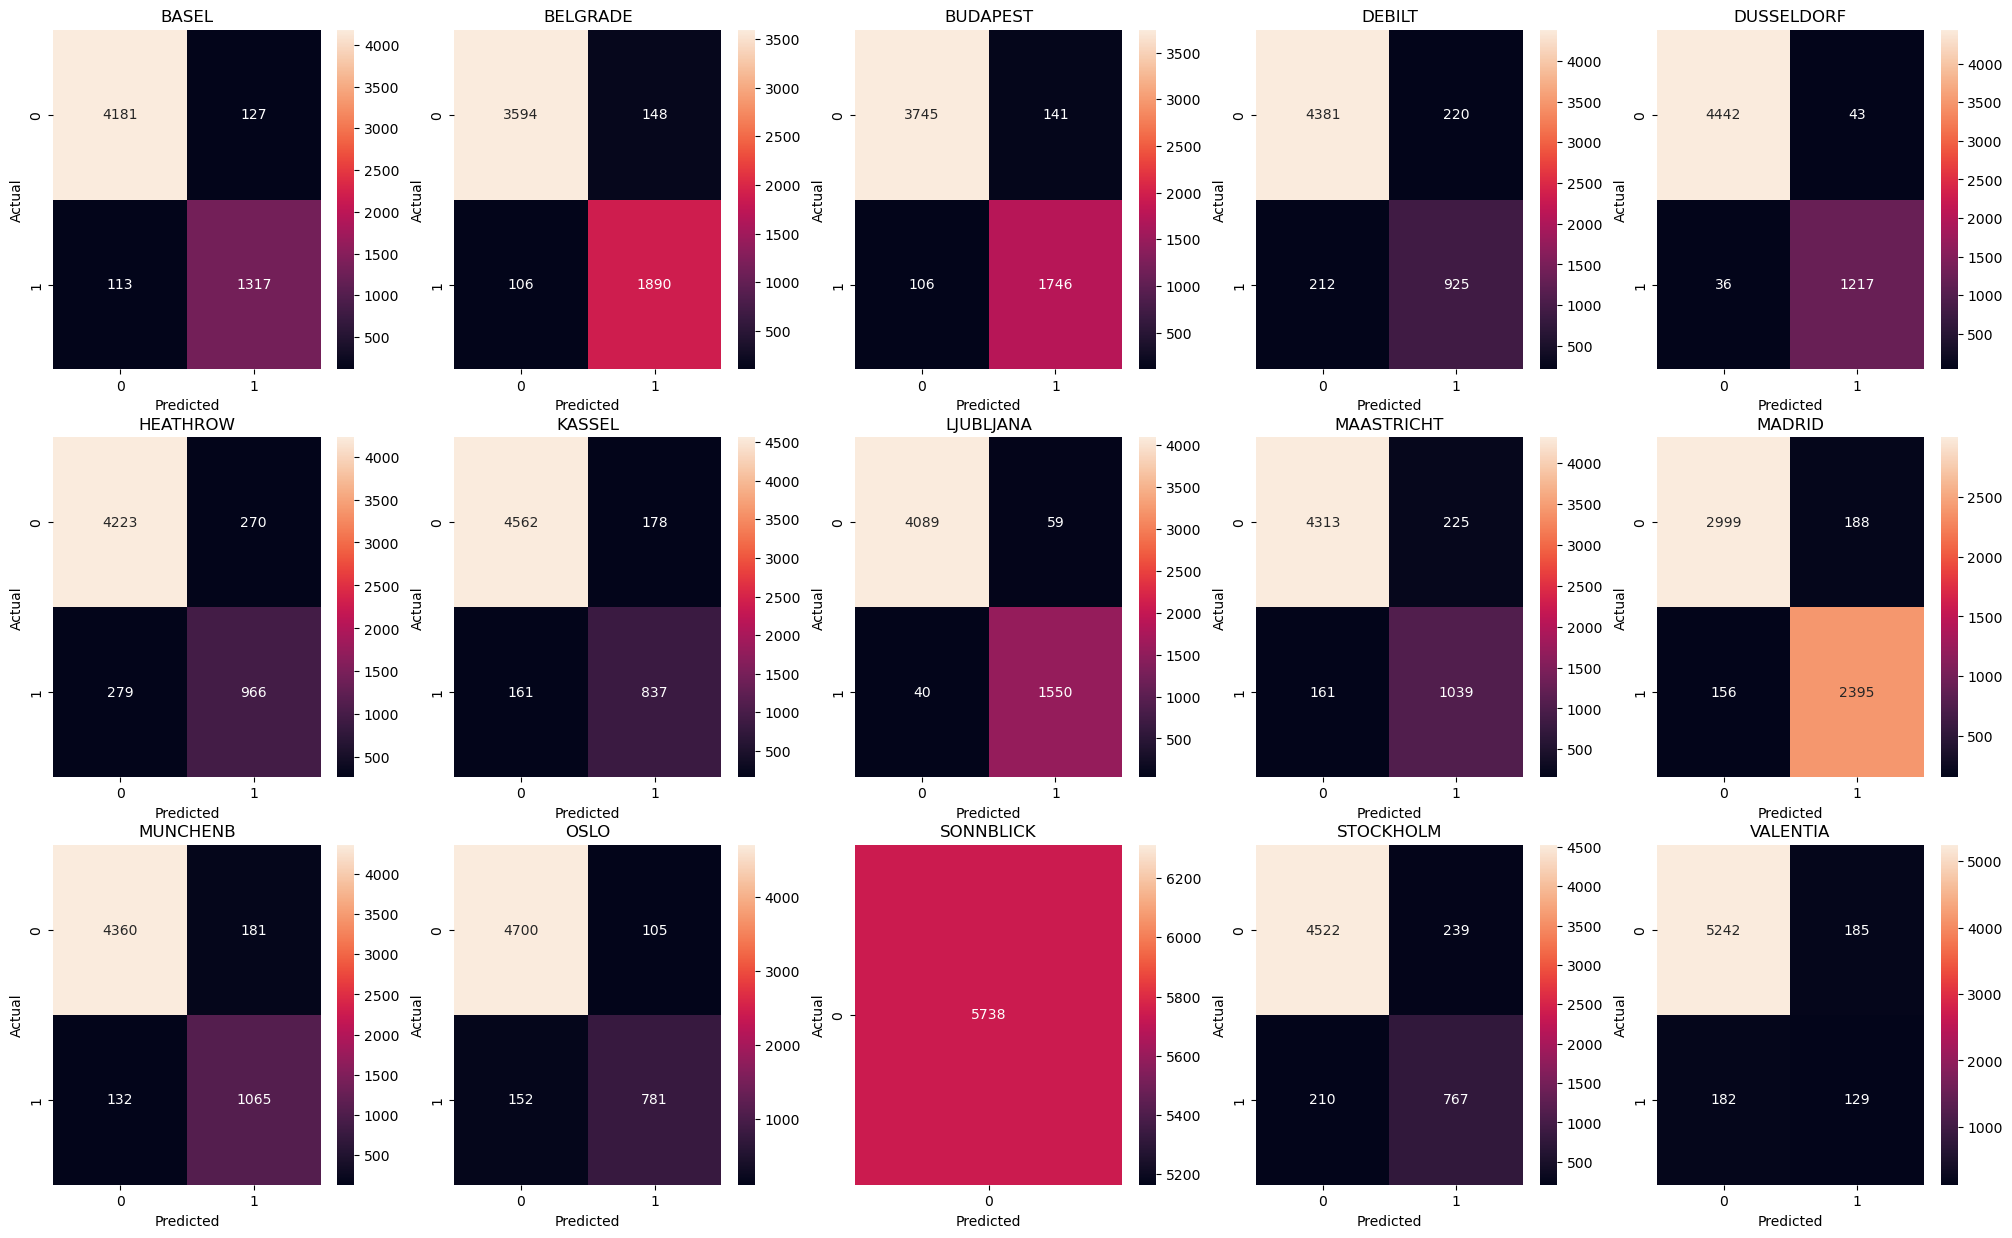

In [16]:
stations = y_test.columns
fig, axes = plt.subplots(3, 5, figsize=(25, 15))
axes = axes.flatten()

for idx, station in enumerate(stations):
    y_true = y_test[station]
    y_pred = y_pred_test[station]

    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        ax=axes[idx],
        cbar=True
    )

    axes[idx].set_title(station.replace("_pleasant_weather", ""))
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

In [19]:
compil = []

rows = []

for station in y_test.columns:
    y_true = y_test[station]
    y_pred = y_pred_test[station]

    tn, fp, fn, tp = confusion_matrix(
        y_true, y_pred, labels=[0, 1]
    ).ravel()

    acc = (tn + tp) / (tn + tp + fp + fn)

    rows.append({
        "Station": station.replace("_pleasant_weather", ""),
        "Accurate 0": tn,
        "Accurate 1": tp,
        "False Pos": fp,
        "False Neg": fn,
        "Accuracy": f"{acc:.0%}"
    })

dt_table = pd.DataFrame(rows)
dt_table

,Station,Accurate 0,Accurate 1,False Pos,False Neg,Accuracy
0,BASEL,4181,1317,127,113,96%
1,BELGRADE,3594,1890,148,106,96%
2,BUDAPEST,3745,1746,141,106,96%
3,DEBILT,4381,925,220,212,92%
4,DUSSELDORF,4442,1217,43,36,99%
5,HEATHROW,4223,966,270,279,90%
6,KASSEL,4562,837,178,161,94%
7,LJUBLJANA,4089,1550,59,40,98%
8,MAASTRICHT,4313,1039,225,161,93%
9,MADRID,2999,2395,188,156,94%
